# Guide Book Data Science

## Data Processing and Cleaning

In [1]:
from collections import Counter, defaultdict
from typing import List, Dict, Any
import pandas as pd

from input_data import INPUT_DATA
pd.set_option('precision', 2)

In [2]:
def events_per_user(event_metrics: List[Dict[str, Any]]) -> defaultdict:
    """Takes event_metrics as input data and returns a list of events
    triggered per user.
    
    Args:
        event_metrics (List[Dict[str, Any]]): Input data, a list of metrics event
        dictionaries of form:
        [
           {"event": "event name", "properties": {"user_id": 1234}},
           ...
           {"event": "another event name", "properties": {"user_id": 567}}
        ]
    Returns:
        user_events (defaultdict(list)): Defaultdict of list of events as values of
        user_id as key of form:
        {
          1234: ['event name', 'another event name'],
          567: ['event name', 'another event name'],
        }
    """

    user_events = defaultdict(list)
    for event_metric in event_metrics:
        user_events[event_metric['properties']['user_id']].append(event_metric['event'])
    
    return user_events

In [3]:
def user_events_trigger_count(user_events: defaultdict) -> dict:
    """Returns the count of times each user triggered each event
    Args:
        user_events (defaultdict(list)): Defaultdict of list of events as values of
        user_id as key of form:
        {
          1234: ['event name', 'another event name'],
          567: ['event name', 'another event name'],
        }
    Returns:
        user_events_triggers (dict): A dictionary of Counter objects of times each
        user triggered each event.
        {
          1234: Counter({'event name': 2, 'another event name': 1}),
          567: Counter({'event name': 10, 'another event name': 12}),
        }
    """
    
    user_events_triggers = {}
    for user, events in user_events.items():
        user_events_triggers[user] = Counter(events)
    return user_events_triggers

In [4]:
def user_event_times_count(user_events_triggers: dict) -> dict:
    """Returns a more processed dictionary object of user_events_triggers
    showing clearly what events each user triggered and the number of times
    of each event.
    
    Args:
        user_events_triggers (dict): A dictionary of Counter objects of times each
        user triggered each event.
        {
          1234: Counter({'event name': 2, 'another event name': 1}),
          567: Counter({'event name': 10, 'another event name': 12}),
        }
    Returns:
        user_event_times (dict): Dictionary showing clearly what events each user
        triggered and the number of times of each event of form:
        {
          1234: {'events':
                  {
                    {'event name': 2, 'another event name': 1}
                  }
                },
          567: {'events':
                  {
                    {'event name': 10, 'another event name': 12}
                  }
                },,
        }
    """
    
    user_event_times = defaultdict(dict)
    for user, events in user_events_triggers.items():
        user_event_times[user]["events"] = {}
        for ev in events:
            user_event_times[user]["events"].update({ev: events[ev]})
    return dict(user_event_times)

In [5]:
def generate_user_events_dataset(user_event_times: dict) -> dict:
    """Generates a dataset of dictionary of pandas series with user_ids
    acting as keys and pandas series as values. Trigger counts are used
    as data and event names are used as indices in the pandas series.
    Later the dictionary keys will form columns when generating a pandas
    dataframe.
    Args:
        user_event_times (dict): Dictionary of events each user
        triggered and the number of times of each event of form:
        {
          1234: {'events':
                  {
                    {'event name': 2, 'another event name': 1}
                  }
                },
          567: {'events':
                  {
                    {'event name': 10, 'another event name': 12}
                  }
                },,
        }
    """
    user_events_ds = {}
    for user, triggers in user_event_times.items():
        user_events_ds[user] = pd.Series(data = triggers['events'].values(), index = triggers['events'].keys())
    return user_events_ds

In [6]:
def generate_dataframe(dataset: dict) -> pd.DataFrame:
    """Returns a Pandas DataFrame from dataset dictionary"""
    
    df = pd.DataFrame(dataset)
    return df

In [7]:
def transpose_clean_data(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Transponses a pandas dataframe for indices to become columns
    and viseversa and returns a cleaned dataframe.
    """
    
    df = dataframe.T
    df.fillna(0, inplace=True)
    df = df.astype('int64')
    
    return df

In [8]:
# Driving Code

# Data processing
user_events = events_per_user(INPUT_DATA)
user_events_triggers = user_events_trigger_count(user_events)
user_event_times = user_event_times_count(user_events_triggers)

# generating dataset
user_events_ds = generate_user_events_dataset(user_event_times)
# Getting pandas dataframe from generated dataset
df = generate_dataframe(user_events_ds)
# Cleaning generated dataframe
df = transpose_clean_data(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 757 to 1789
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ConnectionRequested  2500 non-null   int64
 1   GuideDownload        2500 non-null   int64
 2   GuideSession         2500 non-null   int64
 3   PhotoUpload          2500 non-null   int64
dtypes: int64(4)
memory usage: 97.7 KB


In [10]:
df.describe()

,ConnectionRequested,GuideDownload,GuideSession,PhotoUpload
count,2500.00,2500.00,2500.00,2500.00
mean,0.44,1.44,19.66,2.01
std,1.14,0.79,10.59,4.79
min,0.00,0.00,0.00,0.00
25%,0.00,1.00,13.00,0.00
50%,0.00,1.00,19.00,0.00
75%,0.00,2.00,24.00,1.00
max,11.00,6.00,161.00,24.00


In [11]:
df.head(30)

,ConnectionRequested,GuideDownload,GuideSession,PhotoUpload
757,0,2,22,0
194,1,1,5,14
1656,0,1,32,0
563,0,1,11,2
1276,0,1,13,0
1077,0,2,26,0
2109,0,3,4,0
918,0,2,26,0
1349,0,1,14,0
525,0,1,18,1


In [12]:
df.tail(20)

,ConnectionRequested,GuideDownload,GuideSession,PhotoUpload
632,0,1,6,1
2236,0,1,2,0
2063,0,1,2,0
2024,0,1,1,0
2239,0,2,2,0
2418,0,1,1,0
2389,0,2,1,0
2180,0,1,4,0
2290,0,1,2,0
2343,0,1,1,0


## Exploration and Discussion (PhotoUpload Event)

In [13]:
df["PhotoUpload"]

757      0
194     14
1656     0
563      2
1276     0
        ..
2139     0
2275     0
1357     0
1040     0
1789     0
Name: PhotoUpload, Length: 2500, dtype: int64

In [14]:
df["PhotoUpload"].to_dict()

{757: 0,
 194: 14,
 1656: 0,
 563: 2,
 1276: 0,
 1077: 0,
 2109: 0,
 918: 0,
 1349: 0,
 525: 1,
 1223: 0,
 238: 4,
 542: 1,
 2429: 0,
 2331: 0,
 1625: 0,
 2262: 0,
 230: 1,
 1477: 0,
 1602: 0,
 718: 0,
 1806: 0,
 1001: 0,
 317: 3,
 109: 22,
 781: 0,
 1256: 0,
 2131: 0,
 1298: 0,
 1808: 0,
 1498: 0,
 1635: 0,
 1547: 0,
 1501: 0,
 1591: 0,
 845: 0,
 1093: 0,
 87: 18,
 1566: 0,
 1791: 0,
 2078: 0,
 2224: 0,
 1990: 0,
 281: 2,
 48: 18,
 1936: 0,
 1292: 0,
 165: 19,
 857: 0,
 1890: 0,
 68: 16,
 1838: 0,
 1179: 0,
 166: 12,
 1571: 0,
 1887: 0,
 1614: 0,
 161: 16,
 1138: 0,
 59: 14,
 251: 3,
 854: 0,
 419: 2,
 1022: 0,
 1686: 0,
 635: 3,
 1933: 0,
 950: 0,
 1480: 0,
 2361: 0,
 552: 1,
 1099: 0,
 732: 0,
 99: 16,
 2326: 0,
 905: 0,
 158: 18,
 1969: 0,
 1237: 0,
 668: 7,
 1446: 0,
 1927: 0,
 295: 6,
 387: 4,
 424: 5,
 2324: 0,
 686: 0,
 144: 14,
 1503: 0,
 933: 0,
 233: 2,
 448: 4,
 2198: 0,
 1924: 0,
 38: 14,
 70: 16,
 1053: 0,
 254: 5,
 878: 0,
 938: 0,
 379: 1,
 1460: 0,
 1204: 0,
 992: 0,
 

In [15]:
photo_df = df[df["PhotoUpload"] > 0]

In [16]:
photo_df

,ConnectionRequested,GuideDownload,GuideSession,PhotoUpload
194,1,1,5,14
563,0,1,11,2
525,0,1,18,1
238,2,3,16,4
542,0,1,32,1
...,...,...,...,...
556,0,2,11,1
228,1,1,7,4
654,0,1,8,2
670,0,1,17,1


In [17]:
photo_df.describe()

,ConnectionRequested,GuideDownload,GuideSession,PhotoUpload
count,676.00,676.00,676.00,676.00
mean,1.62,1.46,19.46,7.42
std,1.69,0.84,6.81,6.69
min,0.00,0.00,0.00,1.00
25%,1.00,1.00,15.00,2.00
50%,1.00,1.00,20.00,4.00
75%,2.00,2.00,24.00,14.00
max,11.00,6.00,42.00,24.00


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt


In [19]:
df["PhotoUpload"].mode()

0    0
dtype: int64

In [20]:
df[df["PhotoUpload"] == 0]["PhotoUpload"].count()

1824

In [21]:
df[df["PhotoUpload"] == 1]["PhotoUpload"].count()

128

In [22]:
df[df["PhotoUpload"] == 2]["PhotoUpload"].count()

105

Text(0.5, 0, 'PhotoUpload')

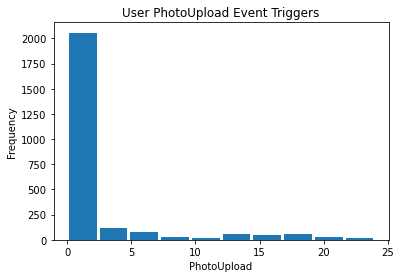

In [23]:
df["PhotoUpload"].plot(kind="hist", rwidth=0.9, title="User PhotoUpload Event Triggers")
plt.xlabel("PhotoUpload")

Text(0.5, 0, 'PhotoUpload')

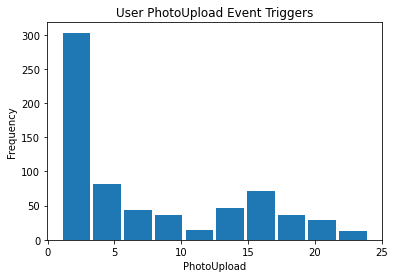

In [24]:
photo_df["PhotoUpload"].plot(kind="hist", rwidth=0.9, title="User PhotoUpload Event Triggers")
plt.xlabel("PhotoUpload")